In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

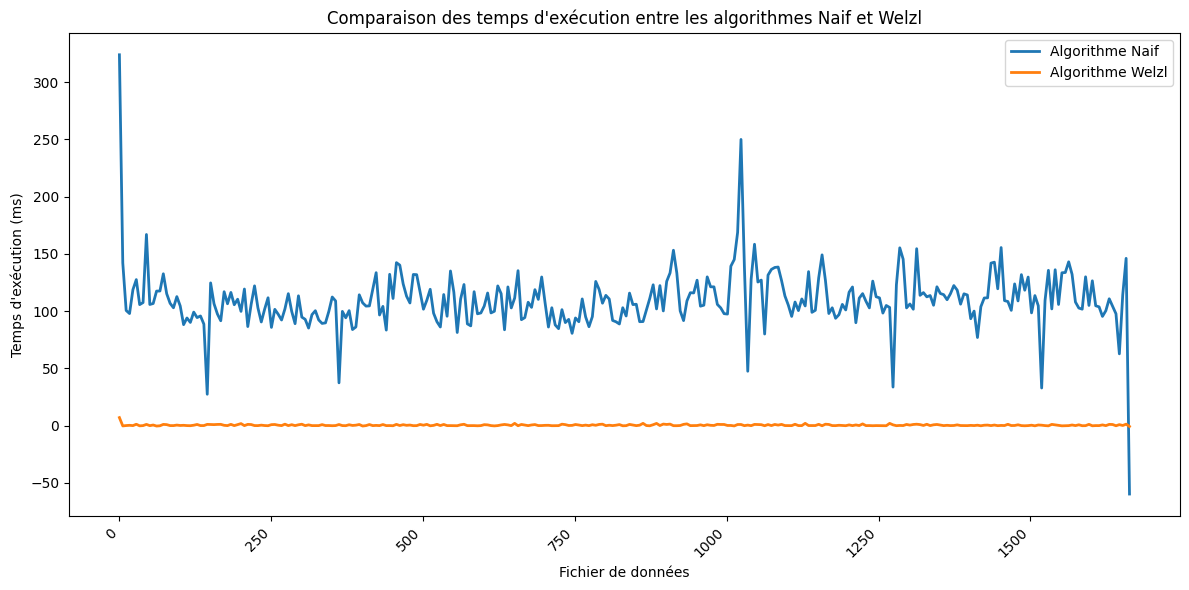

In [24]:

def plot_execution_times(data_file, output_file):
    # Initialisation des listes pour stocker les données
    filenames = []
    execution_times_naif = []
    execution_times_welzl = []

    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            filenames.append(parts[0])
            execution_times_naif.append(int(parts[1]))
            execution_times_welzl.append(int(parts[2]))

    # Création du graphe
    plt.figure(figsize=(12, 6))
    # Lissage des courbes
    x = np.linspace(0, len(filenames), 300)  # Crée une série de points pour lisser les courbes
    spline_naif = make_interp_spline(range(len(filenames)), execution_times_naif, k=3)  # Interpolation spline
    spline_welzl = make_interp_spline(range(len(filenames)), execution_times_welzl, k=3)  # Interpolation spline
    y_smooth_naif = spline_naif(x)
    y_smooth_welzl = spline_welzl(x)
    
    # Tracé des courbes lissées
    plt.plot(x, y_smooth_naif, label='Algorithme Naif', linewidth=2)
    plt.plot(x, y_smooth_welzl, label='Algorithme Welzl', linewidth=2)
    
    # plt.plot(filenames, execution_times_naif, label='Algorithme Naif', color='red')
    # plt.plot(filenames, execution_times_welzl, label='Algorithme Welzl', color='blue')
    plt.xlabel('Fichier de données')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Exemple d'utilisation de la fonction avec un fichier de données
plot_execution_times('./results/dataFile_256points.txt', './graphs/graph_Naif_Welzl_256points.png')


18
18
[906, 2748, 6261, 12436, 20857, 38026, 48371, 77949, 110401, 133079, 187986, 255958, 296335, 506869, 439740, 528954, 649336, 721280]
18
[3, 1, 3, 3, 4, 9, 8, 8, 8, 18, 25, 15, 30, 97, 73, 40, 96, 247]


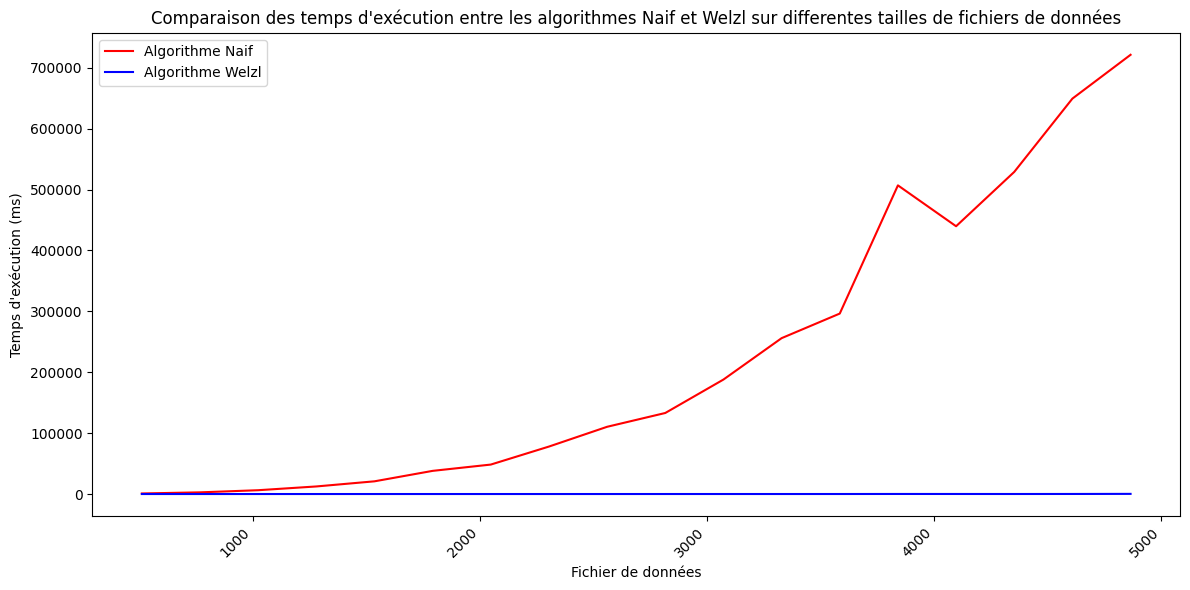

In [23]:
def plot_execution_times_combiningFiles(data_file, output_file):
     # Initialisation des listes pour stocker les données
    point_counts = [512, 768, 1024, 1280, 1536, 1792, 2048, 2304, 2560, 2816, 3072, 3328, 3584, 3840, 4096, 4352, 4608, 4864]
    execution_times_naif = []
    execution_times_welzl = []
    
    # Lecture du fichier de données
    with open(data_file, 'r') as file:
        # Ignorer la première ligne contenant les noms des colonnes
        next(file)
        for line in file:
            # Séparation des données sur la virgule
            parts = line.strip().split(',')
            # filenames.append(parts[0])
            execution_times_naif.append(int(float(parts[0])))
            execution_times_welzl.append(int(float(parts[1])))
    print(len(point_counts))
    print(len(execution_times_naif))
    print(execution_times_naif)
    print(len(execution_times_welzl))
    print(execution_times_welzl)
    # Création du graphe
    plt.figure(figsize=(12, 6))
    
    plt.plot(point_counts,execution_times_naif, label='Algorithme Naif', color='red')
    plt.plot(point_counts,execution_times_welzl, label='Algorithme Welzl', color='blue')
    plt.xlabel('Fichier de données')
    plt.ylabel('Temps d\'exécution (ms)')
    plt.title('Comparaison des temps d\'exécution entre les algorithmes Naif et Welzl sur differentes tailles de fichiers de données')
    plt.legend()
    plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes de l'axe x pour une meilleure lisibilité
    plt.tight_layout()

    # Sauvegarde de l'image
    plt.savefig(output_file)

    # Affichage du graphe
    plt.show()

# Appel de la fonction avec le chemin du fichier et le nom du fichier de sortie
plot_execution_times_combiningFiles('./results/dataFile_combiningPoints.txt', './graphs/graph_Naif_Welzl_combiningPoints.png')